## I. Objective
- Match suspicious bank transactions to blockchain transaction hashes:

## II. Technical Objective
    1. Import libraries
    2. Import the data
    3. Clean Data
    4. Merge Data (match suspecious bank trans)

## Importing Libraries and Setting Up Defaults 
### In this section I am
- Importing all my libraries
- Setting my configurations

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns',500) 

## Importing Data

In [2]:
#importing bank connections and transactions datasets  
bank_connections = pd.read_csv('/Users/williamnsambu/Documents/Dev/ProffessionalAdvencement/DataScience/JupyterNotebooks/data/bank_connections.csv', index_col = None, header=0, encoding='latin-1')

transactions_map = pd.read_csv('/Users/williamnsambu/Documents/Dev/ProffessionalAdvencement/DataScience/JupyterNotebooks/data/transactions_map.csv', index_col = None, header=0, encoding='latin-1')

btc_tx = pd.read_csv('/Users/williamnsambu/Documents/Dev/ProffessionalAdvencement/DataScience/JupyterNotebooks/data/btc-tx.csv', error_bad_lines=False, index_col = None, header=0, encoding='latin-1')

btc_usd_2021 = pd.read_csv('/Users/williamnsambu/Documents/Dev/ProffessionalAdvencement/DataScience/JupyterNotebooks/data/btc_usd_2021.csv', index_col = None, header=0, encoding='latin-1')

b'Skipping line 12137: expected 5 fields, saw 9\n'
/Users/williamnsambu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Cleansing
There are different steps in the data cleasing but I will only use one which is removing nulls (NaN) in our datasets

In [3]:
#displaying details about the data
#display(bank_connections.info(verbose=True))
display(transactions_map.info(verbose=True))
display(btc_tx.info(verbose=True))
#btc_usd_2021.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4507 non-null   int64  
 1   icij_sar_id               4507 non-null   int64  
 2   filer_org_name_id         4507 non-null   object 
 3   filer_org_name            4507 non-null   object 
 4   begin_date                4501 non-null   object 
 5   end_date                  4501 non-null   object 
 6   originator_bank_id        4507 non-null   object 
 7   originator_bank           4507 non-null   object 
 8   originator_bank_country   4507 non-null   object 
 9   originator_iso            4507 non-null   object 
 10  beneficiary_bank_id       4507 non-null   object 
 11  beneficiary_bank          4507 non-null   object 
 12  beneficiary_bank_country  4507 non-null   object 
 13  beneficiary_iso           4507 non-null   object 
 14  number_t

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427711 entries, 0 to 1427710
Data columns (total 5 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   time                    1427711 non-null  object
 1   Hash                    460943 non-null   object
 2   Sender                  460943 non-null   object
 3   Receiver                299857 non-null   object
 4   Transaction_amount_BTC  299857 non-null   object
dtypes: object(5)
memory usage: 54.5+ MB


None

In [4]:
#dropping nulls (NaN)
#bank_connections_clean = bank_connections.dropna()
transactions_map_clean = transactions_map.dropna()
btc_tx_clean = btc_tx.dropna()
#btc_usd_2021_clean = btc_usd_2021.dropna()

In [5]:
#display(bank_connections_clean.info(verbose=True))
display(transactions_map_clean.info(verbose=True))
display(btc_tx_clean.info(verbose=True))
#btc_usd_2021_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 0 to 4506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4390 non-null   int64  
 1   icij_sar_id               4390 non-null   int64  
 2   filer_org_name_id         4390 non-null   object 
 3   filer_org_name            4390 non-null   object 
 4   begin_date                4390 non-null   object 
 5   end_date                  4390 non-null   object 
 6   originator_bank_id        4390 non-null   object 
 7   originator_bank           4390 non-null   object 
 8   originator_bank_country   4390 non-null   object 
 9   originator_iso            4390 non-null   object 
 10  beneficiary_bank_id       4390 non-null   object 
 11  beneficiary_bank          4390 non-null   object 
 12  beneficiary_bank_country  4390 non-null   object 
 13  beneficiary_iso           4390 non-null   object 
 14  number_t

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299857 entries, 0 to 1427710
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   time                    299857 non-null  object
 1   Hash                    299857 non-null  object
 2   Sender                  299857 non-null  object
 3   Receiver                299857 non-null  object
 4   Transaction_amount_BTC  299857 non-null  object
dtypes: object(5)
memory usage: 13.7+ MB


None

In [6]:
display(transactions_map_clean.head())
display(btc_tx_clean.head())

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 25, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,5.689852e+07
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 30, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.0,1.162384e+08
94,223350,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 17, 2012","Jul 17, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,1.0,3.464435e+04
95,223351,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 20, 2012","Jun 20, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,1.0,4.000000e+04
96,223352,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"May 24, 2012","May 24, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,1.0,3.685587e+04


,time,Hash,Sender,Receiver,Transaction_amount_BTC
0,2015-03-31,16f27194b06bcf1f61b1531a2a861fdcd027a232428090...,1BtNH4rtj3PVe6PWYsziQMnXofZmoPmGHu,1PrGFmmFFeD6v9ihS74ewjAzSMmQxsQAuw,5272.9999
1,2015-03-31,68a4c74ebb211c5c61caa0296d9eae5b0336e0c7b7c68a...,1NE3QFkf4aFUgCNTvGjiZsY59yDsGratiU 1Bst4GwKrN2...,18zXyBVHCU3hu3ivszZNh3NqA1eA1jVBsm,4509.87714053
2,2015-03-31,ddf989c7797164150de0764e364f7e01b7253538de753f...,15HgmxddgExHKTfkXwacQgKf9nx8PZEDri,1EdyFyyzgxWsV3P1x41vKDrEeDDyz9QAMe,4138.09424942
3,2015-03-31,1866b030f8a3a6f83393fa23215759c05d13a2bf30d716...,18uvUoZuDFXaPjKBDHu8w2PNYqY6dXDs8G,1HoiNQf18RwzeLhBmcGM8Pqqyqc9KCSiYE,4458.36429747
4,2015-03-31,1866b030f8a3a6f83393fa23215759c05d13a2bf30d716...,18uvUoZuDFXaPjKBDHu8w2PNYqY6dXDs8G,14LPd6dcAZpJD3jfz8FPJcgdL8G1hMWZTq,8000


In [7]:
#converting columns 'time' and 'begin_date' from object to date time data type
transactions_map_clean['begin_date'] = pd.to_datetime(transactions_map_clean['begin_date'])
btc_tx_clean['time'] = pd.to_datetime(btc_tx_clean['time'])

<ipython-input-7-4ed6d761e0e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_map_clean['begin_date'] = pd.to_datetime(transactions_map_clean['begin_date'])
<ipython-input-7-4ed6d761e0e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_tx_clean['time'] = pd.to_datetime(btc_tx_clean['time'])


In [8]:
display(transactions_map_clean.head(1))
display(btc_tx_clean.head(1))
display(transactions_map_clean.info(verbose=True))
btc_tx_clean.info(verbose=True)

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-03-25,"Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,56898523.47


,time,Hash,Sender,Receiver,Transaction_amount_BTC
0,2015-03-31,16f27194b06bcf1f61b1531a2a861fdcd027a232428090...,1BtNH4rtj3PVe6PWYsziQMnXofZmoPmGHu,1PrGFmmFFeD6v9ihS74ewjAzSMmQxsQAuw,5272.9999


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 0 to 4506
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        4390 non-null   int64         
 1   icij_sar_id               4390 non-null   int64         
 2   filer_org_name_id         4390 non-null   object        
 3   filer_org_name            4390 non-null   object        
 4   begin_date                4390 non-null   datetime64[ns]
 5   end_date                  4390 non-null   object        
 6   originator_bank_id        4390 non-null   object        
 7   originator_bank           4390 non-null   object        
 8   originator_bank_country   4390 non-null   object        
 9   originator_iso            4390 non-null   object        
 10  beneficiary_bank_id       4390 non-null   object        
 11  beneficiary_bank          4390 non-null   object        
 12  beneficiary_bank_cou

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299857 entries, 0 to 1427710
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   time                    299857 non-null  datetime64[ns]
 1   Hash                    299857 non-null  object        
 2   Sender                  299857 non-null  object        
 3   Receiver                299857 non-null  object        
 4   Transaction_amount_BTC  299857 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 13.7+ MB


## Match suspicious bank transactions to blockchain transaction hashes

In [9]:
#Match suspicious bank transactions to blockchain transaction hashes
suspicious_bank_and_blockchain_transactions = transactions_map_clean.merge(btc_tx_clean, left_on='begin_date', right_on='time', how ='inner')

In [10]:
suspicious_bank_and_blockchain_transactions.sample(10)

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions,time,Hash,Sender,Receiver,Transaction_amount_BTC
13587,224725,4145,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-09-01,"Sep 10, 2015",dbs-bank,DBS Bank,China,CHN,bank-of-east-asia-ltd-hong-kong-hkg,"Bank of East Asia, Ltd",Hong Kong,HKG,2.0,2814980.00,2015-09-01,f41295870d93de44f3e0c0e965a85089fda4cee42a72b6...,19r8tM8xh54gao3J63PpvTeQqQnPrkR9Ny 1PWmrXsaEFi...,1MmB5whtFNHLV6Wdp55cL9x1Mm5pWod24e,0.95
258421,230117,2280,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-01-25,"Jan 25, 2016",alfabank,Alfabank,Russia,RUS,wells-fargo-bank-na-miami-fl-usa,Wells Fargo Bank Na,United States,USA,1.0,180.00,2016-01-25,41eb90ea86882cdaac2da340704e6c2f19e5c75fd0068c...,13z8KW7TBTMdcq7JHZUZVN79P7rJu4fNA3,1ARY2XfYSt3AYdE5ZgGBC8DSCcYR4W5iap,6416.45685891
35841,225079,2476,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-12-23,"Dec 23, 2015",aktia-savings-bank,Aktia Savings Bank,Finland,FIN,trasta-komercbanka-riga-latvia-lva,Trasta Komercbanka,Latvia,LVA,15.0,447610.40,2015-12-23,87364d1d26e89dc6ec66b889c26feaa333c8d24830227b...,36ygPHwbkuDDhZbcuj6QkRgGmCdmBg6CXJ,3JHzpKn8qHiBuMcgnzFjP1nZ4GPBGUfxzR,4481.253224
270595,230119,2280,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-01-25,"Jan 25, 2016",alfabank,Alfabank,Russia,RUS,banco-de-sabadell-sa-maimi-fl-usa,Banco De Sabadell S.A.,United States,USA,1.0,270.00,2016-01-25,80f6e17065551d71a45c9d0bd7fef8ce83a22cc926c556...,14ShStQGqiMeLroQiGgJXD6mzw4r5jT9kH,1P1kn2mHBVn4m2KPyzPMXQnrULjpUbCGub,3933.71812718
136127,226824,3913,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-12-01,"Dec 22, 2016",societe-generale-zurich,Societe Generale Zurich,Switzerland,CHE,ablv-bank-as-riga-latvia-lva,"ABLV Bank, AS",Latvia,LVA,5.0,5799925.00,2016-12-01,81d5b52b16affa61819436da3cd85373d7477202fec20d...,13KWmYje52mjt4GdvbhAhrtXJFSvmfcpfE,1GJneduoqVJBQdL1R1vCuYDNg3r74zdHc9,0.0105201
156874,234911,4055,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-12-01,"Dec 28, 2016",gazprombank-switzerland-ltd,Gazprombank Switzerland Ltd,Switzerland,CHE,regionala-investiciju-banka-riga-latvia-lva,Regionala Investiciju Banka,Latvia,LVA,5.0,1148457.07,2016-12-01,8e763da4ed14164f99c9a32c3afa2de8652d7efd9def37...,19MKPteXrJeZUR6QcWwSgGCXkQ1QpxmJF7,18yeoPYtZbr3bJqUx6xcxQAoSepHqHUJMQ,0.207008
146357,234911,4055,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-12-01,"Dec 28, 2016",gazprombank-switzerland-ltd,Gazprombank Switzerland Ltd,Switzerland,CHE,regionala-investiciju-banka-riga-latvia-lva,Regionala Investiciju Banka,Latvia,LVA,5.0,1148457.07,2016-12-01,75ad768eac099af9c0f4bf2867ba2a0d2e5ef72f0335a6...,1GFeeASVjq13QhdHv8gAqnN6fA6ZC6BWDd,1D2yXaP9Z6NSDadJQ8rAMZwtTzAaFYp24a,0.14
134081,226824,3913,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-12-01,"Dec 22, 2016",societe-generale-zurich,Societe Generale Zurich,Switzerland,CHE,ablv-bank-as-riga-latvia-lva,"ABLV Bank, AS",Latvia,LVA,5.0,5799925.00,2016-12-01,cb5327855c39d7e5f3439a98349179a13b0705111d11a7...,1HZCMe7QfGoqstR4LME2gCLUHyNCkfV1TN,3EKn8nVWRPHAzHVpN3LZ3tNVKjQfQb3hA8,0.00131436
151514,234911,4055,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-12-01,"Dec 28, 2016",gazprombank-switzerland-ltd,Gazprombank Switzerland Ltd,Switzerland,CHE,regionala-investiciju-banka-riga-latvia-lva,Regionala Investiciju Banka,Latvia,LVA,5.0,1148457.07,2016-12-01,56b7b4d1854d9bbb7a359f79e38dbbaa06787fccfdc4f8...,1HasheerTLWT4Di9cnArqECtGtmHVTrJmS,1NRu7jk5gken5LJ54smsVN3YMFcTXoFSfT,0.0016748
298770,234436,2494,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2016-09-01,"Sep 29, 2016",rietumu-banka,Rietumu Banka,Latvia

## Visualizations
- Visualizing the originator bank country with more suspicious activities based on year

In [11]:
import matplotlib.pyplot as plt

In [12]:
#engineering a new feature called 'year' from the 'begin_date' column
suspicious_bank_and_blockchain_transactions['year_activitie'] = suspicious_bank_and_blockchain_transactions['begin_date'].dt.year
suspicious_bank_and_blockchain_transactions.head(1)

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions,time,Hash,Sender,Receiver,Transaction_amount_BTC,year_activitie
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-03-25,"Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,56898523.47,2015-03-25,e27f7544ef6d370234e9df8fc5775077b8d7d0bc6f8898...,3KBUuGko4H5ke7EVsq9B7PLK1c5Askdd7y,3KgtbGgaX2ngstNpvyv7LwpHSweVeqGbpM,7000,2015


In [13]:
suspicious_bank_and_blockchain_transactions_year = suspicious_bank_and_blockchain_transactions.groupby('originator_bank_country', as_index=False).sum()
suspicious_bank_and_blockchain_transactions_year = suspicious_bank_and_blockchain_transactions_year[['number_transactions', 'originator_bank_country']]
suspicious_bank_and_blockchain_transactions_year = suspicious_bank_and_blockchain_transactions_year.sort_values(by='number_transactions', ascending=False)
suspicious_bank_and_blockchain_transactions_year.head()

,number_transactions,originator_bank_country
32,1544042.0,Latvia
58,407649.0,Switzerland
33,272731.0,Liechtenstein
14,132954.0,China
51,70387.0,Russia


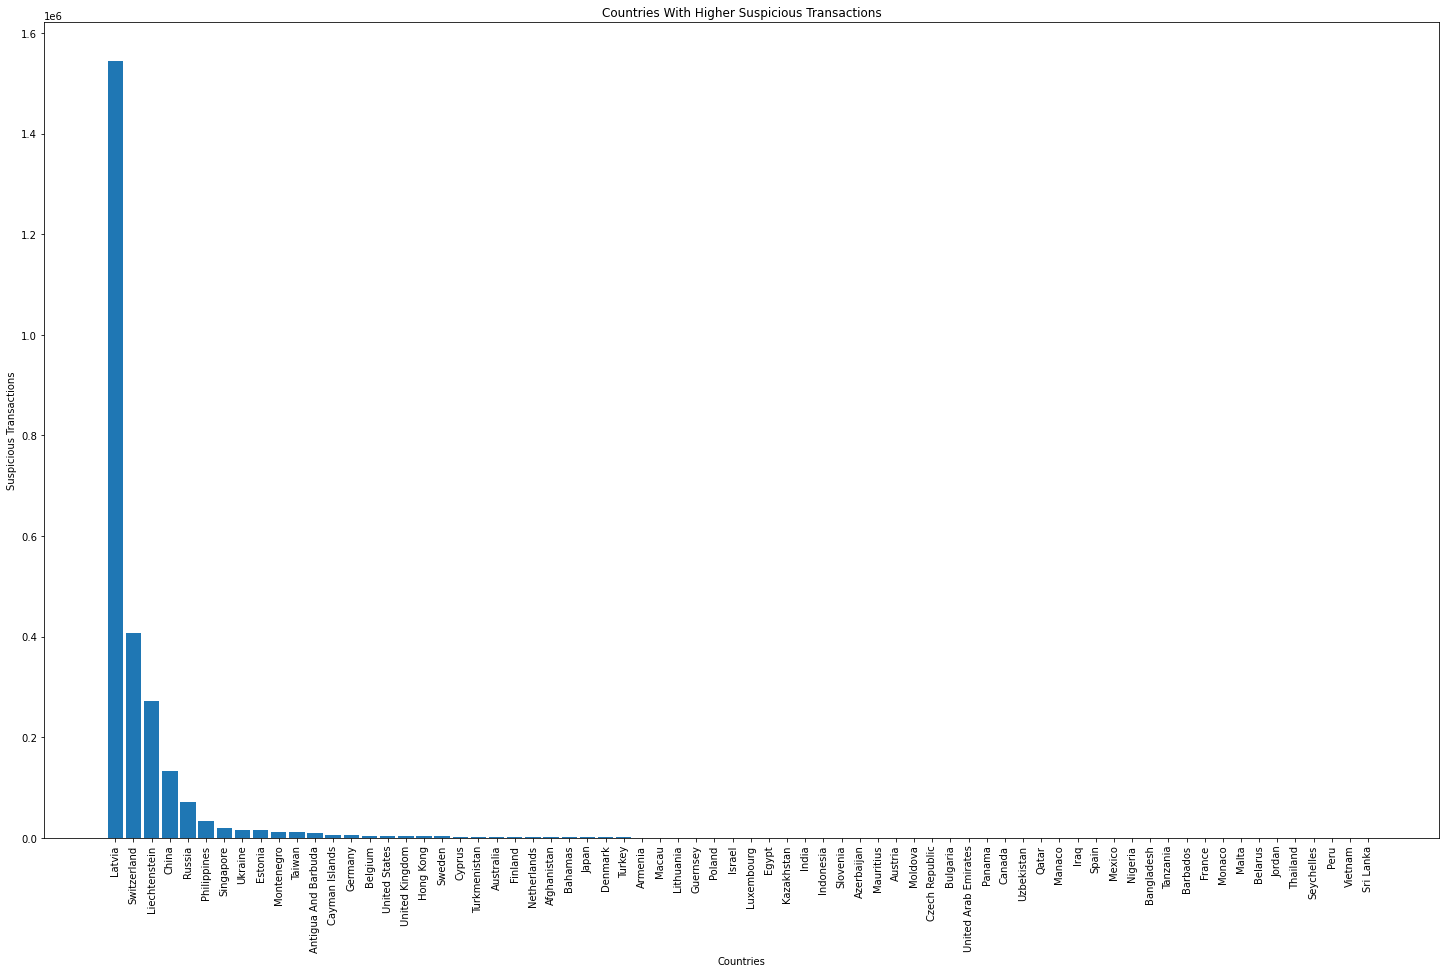

In [14]:
plt.figure(figsize=(25,15))

plt.bar(suspicious_bank_and_blockchain_transactions_year['originator_bank_country'], suspicious_bank_and_blockchain_transactions_year['number_transactions'], width=0.85)

plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Suspicious Transactions')
plt.title('Countries With Higher Suspicious Transactions')

plt.show()

Text(0.5, 1.0, 'Countries With Higher Suspicious Transactions')

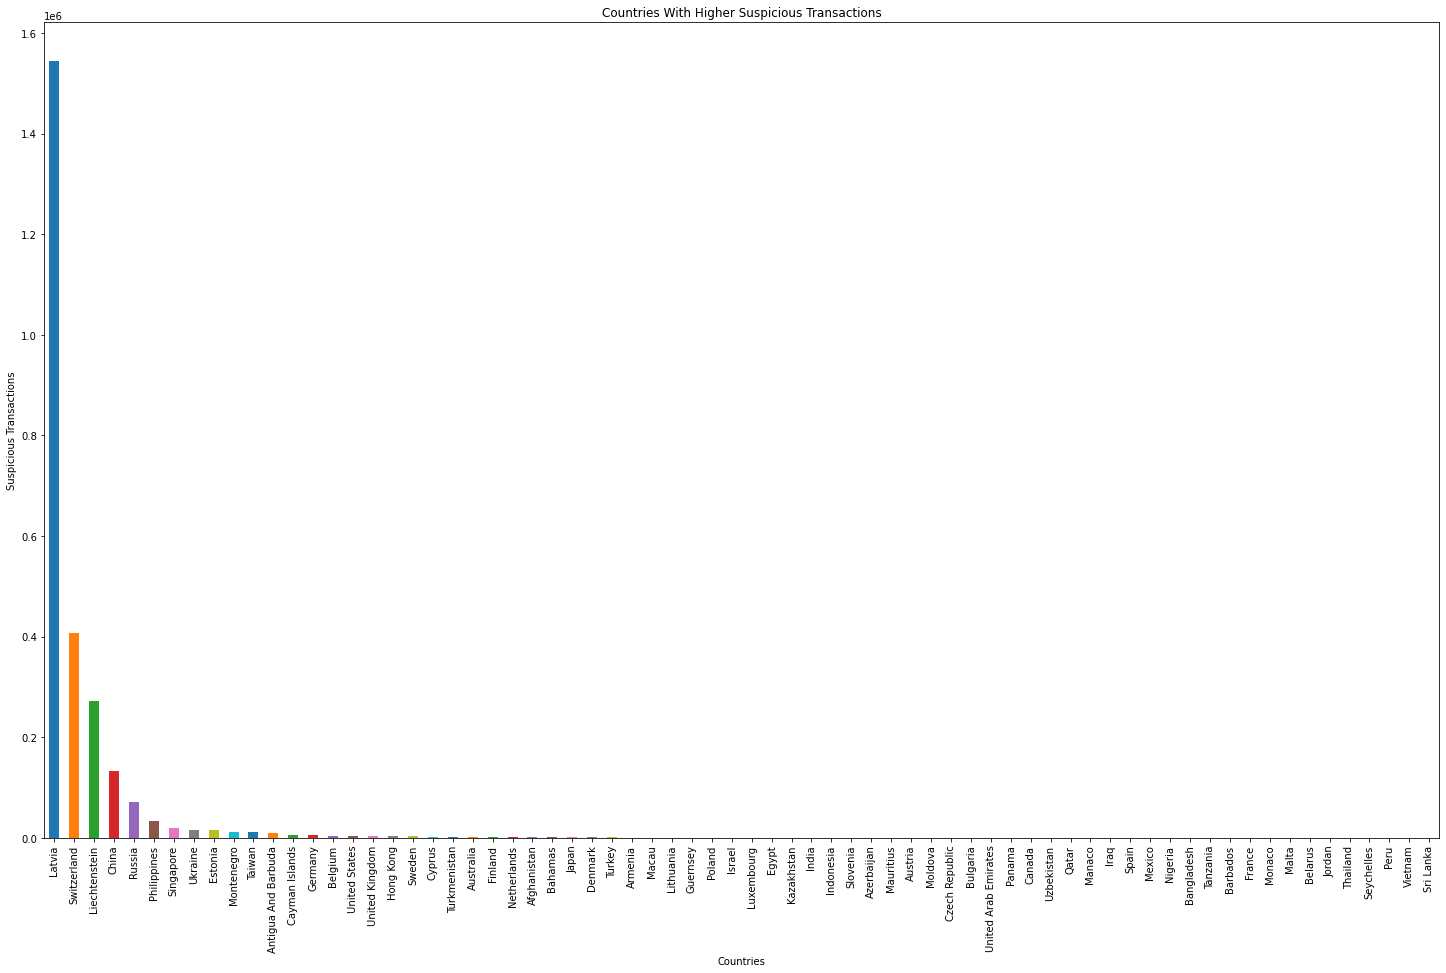

In [15]:
#visualizing countries with higher suspicious transactions
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
suspicious_bank_and_blockchain_transactions_year.plot.bar(x='originator_bank_country', y='number_transactions',
                   figsize=(25,15), color=colors,
                   legend=False)
plt.ylabel('Suspicious Transactions')
plt.xlabel('Countries')
plt.title('Countries With Higher Suspicious Transactions')